In [1]:
import pandas as pd
from constants import *
from helpers import normalise_number_data, normalise_word_data
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn

In [2]:
np.random.seed(524321)

In [3]:
google_products = pd.read_csv(GOOGLE_SMALL_PATH)
amazon_products = pd.read_csv(AMAZON_SMALL_PATH)

In [4]:
google_products['price'] = normalise_number_data(google_products['price'])
amazon_products['price'] = normalise_number_data(amazon_products['price'])

In [5]:
google_products[['name']]
google_word_columns = ['name', 'description', 'manufacturer']
amazon_word_columns = ['title', 'description', 'manufacturer']

In [6]:
google_products[google_word_columns] = normalise_word_data(google_products[google_word_columns].astype(str))
amazon_products[amazon_word_columns] = normalise_word_data(amazon_products[amazon_word_columns].astype(str))

## Part 2

Since the column `Sample` is just an incremntal ID of the observation, we have not included it in the analysis. When including the column `pox` the bin width would be very small. As this is not practical when compared to the other columns (which require wider bin widths and more bins), we have excluded the column from any further analysis.

### Pre-processing discussion
From the distribution of the original dataset it is apparent that the majority of the data lies within range with a width of `0.1`. As a result, choosing median imputation would be favourable since outliers would not have as much affect with this strategy as opposed to mean imputation.

### Comparing Classification Algorithms

The aim is to find the classifying method that performs the best on the test data without either overfitting or underfitting on the training data.

To achieve this goal we initially normalised the data by fitting the data to a standard noraml distribution. Then the results were used to train three different clissifying model:

- KNN with 5 neighbours
- KNN with 10 neighbours
- decision tree classifier

The classifier used at each stage was thr normal unmodified classifier offered by the library. This helped ensure consistency for the k_means classifiers as no other parameter but the number of neighbours was changed.

Accuracies on training data:
- 0.8098591549295775 for KNN with 5 neigbhours
- 0.772635814889336 for KNN with 10 neighbours
- 0.9849094567404426 for decision tree classifier

Accuracies on test data:
- 0.6816326530612244 for KNN with 5 neighbours
- 0.6693877551020408 for KNN with 10 neighbours
- 0.6714285714285714 for decision tree classifier


The score for the dtc obtained on the training data suggests that the classifier is overly fitted to the training data. This implies that there is a high chance of the claddifier performing exceptionally on the test data but failing to predict feasible values on test data which it was not fitted to. The consequence of this is apparent on the results demonstrated above. The decision tree classifier performed well on the training data with a score of 0.98 whereas the test data only scored 0.67 which is clearly much lower than the training score.

After multiple trials, it became evident that the results for the score were in the neighberhood of 0.67 and all of the classification methods seem to have achieved the same score of 0.67. Therefore, there is no clear advantage to any of the algorithms if all the parameters are set to their default settings from the parent library.

## Feature Engineering




In [36]:
yeast_data = pd.read_csv(YEAST_PATH)
yeast_data['Class'] = yeast_data.Class.replace(to_replace=yeast_data.Class.unique(), value=[0, 1])

In [8]:
from sklearn.impute import SimpleImputer    

In [9]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(yeast_data.drop(['Class', 'pox', 'Sample'], axis=1), yeast_data['Class'], test_size=0.33)
X_train_mean = pd.DataFrame(mean_imputer.fit_transform(X_train))
X_train_median = pd.DataFrame(median_imputer.fit_transform(X_train))


X_test_mean = pd.DataFrame(mean_imputer.fit_transform(X_test))
X_test_median = pd.DataFrame(median_imputer.fit_transform(X_test))

#Y = yeast_data['Class']

In [11]:
X_train_mean.describe()

,0,1,2,3,4,5,6
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.496754,0.495944,0.499978,0.262856,0.508274,0.504836,0.282707
std,0.131334,0.122079,0.085026,0.135795,0.107329,0.183955,0.171251
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.480000,0.220000
50%,0.496754,0.490000,0.500000,0.230000,0.500000,0.504836,0.220000
75%,0.560000,0.570000,0.550000,0.300000,0.500000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,3.500849,6.001456,4.501092


In [12]:
X_train_median.describe()

,0,1,2,3,4,5,6
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.495372,0.495543,0.500795,0.259406,0.508049,0.505142,0.279679
std,0.131415,0.122105,0.085070,0.136295,0.107338,0.183959,0.171779
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.480000,0.220000
50%,0.480000,0.480000,0.510000,0.220000,0.500000,0.510000,0.220000
75%,0.560000,0.570000,0.550000,0.300000,0.500000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,3.500849,6.001456,4.501092


In [13]:
from sklearn.preprocessing import StandardScaler, normalize
stdscl = StandardScaler(with_mean=True, with_std=True)

In [14]:
X_train_std = pd.DataFrame(stdscl.fit_transform(X_train_median))
X_train_norm = pd.DataFrame(normalize(X_train_median))

X_test_std = pd.DataFrame(stdscl.fit_transform(X_test_median))
X_test_norm = pd.DataFrame(normalize(X_test_median))

In [15]:
X_train_std.describe()

,0,1,2,3,4,5,6
count,9.940000e+02,9.940000e+02,9.940000e+02,9.940000e+02,9.940000e+02,9.940000e+02,9.940000e+02
mean,-1.143731e-16,-5.254013e-16,1.007913e-15,-7.148317e-18,1.340309e-17,1.787079e-17,7.863149e-17
std,1.000503e+00,1.000503e+00,1.000503e+00,1.000503e+00,1.000503e+00,1.000503e+00,1.000503e+00
min,-2.933951e+00,-2.995198e+00,-3.420015e+00,-1.904227e+00,-7.502684e-02,-2.747333e+00,-1.628958e+00
25%,-6.499636e-01,-6.189883e-01,-4.797841e-01,-6.563066e-01,-7.502684e-02,-1.367422e-01,-3.475941e-01
50%,-1.170333e-01,-1.273588e-01,1.082620e-01,-2.892712e-01,-7.502684e-02,2.641967e-02,-3.475941e-01
75%,4.920299e-01,6.100855e-01,5.786989e-01,2.979855e-01,-7.502684e-02,1.351943e-01,1.183562e-01
max,3.841878e+00,4.133430e+00,5.871114e+00,5.436481e+00,2.789618e+01,2.989297e+01,2.458711e+01


In [16]:
X_train_norm.describe()

,0,1,2,3,4,5,6
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.406848,0.408395,0.417271,0.212003,0.422065,0.417614,0.229606
std,0.084098,0.082189,0.076726,0.099143,0.051295,0.060741,0.086880
min,0.052470,0.044185,0.095172,0.000000,0.082045,0.000000,0.000000
25%,0.353515,0.358260,0.371180,0.145230,0.395575,0.390407,0.180328
50%,0.408093,0.410041,0.426579,0.186693,0.420763,0.422914,0.201132
75%,0.457873,0.459554,0.468744,0.252458,0.446513,0.451624,0.251100
max,0.686168,0.700569,0.694444,0.666815,0.966781,0.984776,0.971999


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn = KNeighborsClassifier(n_neighbors=5)
dtc = DecisionTreeClassifier()

In [19]:
X_train = X_train_norm
X_test = X_test_norm

In [20]:
knn.fit(X_train, y_train)
score_train_knn = knn.score(X_train, y_train)
score_test_knn = knn.score(X_test, y_test)



knn_10.fit(X_train, y_train)
score_train_knn_10 = knn_10.score(X_train, y_train)
score_test_knn_10 = knn_10.score(X_test, y_test)

In [21]:
print(score_train_knn, "   training k = 5")
print(score_test_knn, "   test k = 5")


print(score_train_knn_10, "   training k = 10")
print(score_test_knn_10, "   test k = 10")


0.8098591549295775    training k = 5
0.6816326530612244    test k = 5
0.772635814889336    training k = 10
0.6693877551020408    test k = 10


In [22]:
from sklearn.preprocessing import KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=5, encode='ordinal')


X_binned = enc.fit_transform(X_train)
X_binned_test = enc.fit_transform(X_test)

In [23]:
dtc.fit(X_binned, y_train)
score_dtc = dtc.score(X_binned, y_train)
score_test_dtc = dtc.score(X_binned_test, y_test)

In [24]:
print(score_dtc, "   training dtc")
print(score_test_dtc, "   test dtc")


0.9798792756539235    training dtc
0.6551020408163265    test dtc


In [25]:
def pair_interaction_featurize(X):
    features_multiplied = pd.DataFrame()
    for i in X:
        for j in X:
            if int(j) > int(i):
                col1 = pd.Series(X[i])
                col2 = pd.Series(X[j])
                col1 = col1.mul(col2)
                features_multiplied[int(str(i) + str(j))] = col1 
    generated_features = pd.concat([features_multiplied, X], axis=1)
    return features_multiplied

         
X_train_interaction_pair = pair_interaction_featurize(X_train)
X_test_interaction_pair = pair_interaction_featurize(X_test)

In [77]:
from sklearn.feature_selection import mutual_info_classif

enc_mi = KBinsDiscretizer(n_bins = 5, encode = "ordinal")
X_binned_mi = enc_mi.fit_transform(X_train_interaction_pair)
X_binned_test_mi = enc_mi.fit_transform(X_test_interaction_pair)

mutual_info_classifier = mutual_info_classif(X_binned_mi, y_train)


entropy_with_index = sorted([(index, el) for index, el in zip(mutual_info_classifier, X_train_interaction_pair.columns)], key=lambda x: x[0], reverse=True)


In [75]:
scores_train = []
scores_test = []
for i in range(1, len(entropy_with_index)):
    columns = [i[1] for i in entropy_with_index[0:i]]
    knn.fit(X_train_interaction_pair[columns], y_train)
    score_train  = knn.score(X_train_interaction_pair[columns], y_train)
    score_test  = knn.score(X_test_interaction_pair[columns], y_test)
    scores_train.append(score_train)
    scores_test.append(score_test)

0.8189134808853119 training score
0.6836734693877551 test score


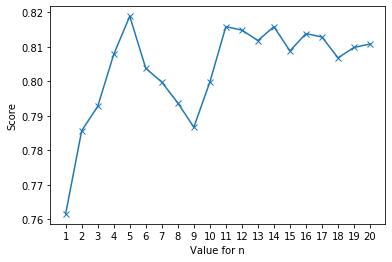

In [76]:
range_n = range(1, len(entropy_with_index))    
op = plt.plot(range_n, scores_train)
plt.setp(op,'marker', 'x')
plt.xlabel("Value for n")
plt.xticks(range_n)
plt.ylabel("Score")
print(max(scores_train), "training score")
print(max(scores_test), "test score")
plt.show()

In [29]:
def kmeans_interaction_featurize(X, X_binned):
    kmeans = []
    KMEANS_RANGE = 16
    generated_features_kmeans = pd.DataFrame()
    for i in range(2, KMEANS_RANGE):
        kmeans.append(KMeans(n_clusters=i, random_state = 0).fit(X))
        generated_features_kmeans[int(str(1) + str(i))] = kmeans[i-2].predict(X)
    generated_features_kmeans = pd.concat([generated_features_kmeans, X_binned], axis=1)
    return generated_features_kmeans

In [30]:
from sklearn.cluster import KMeans
X_binned_kmeans = enc_mi.fit_transform(X_train)
X_binned_test_kmeans = enc_mi.fit_transform(X_test)

In [31]:
enc_mi = KBinsDiscretizer(n_bins=15, encode = "ordinal")
X_binned_mi = pd.DataFrame(enc_mi.fit_transform(X_train))
X_binned_test_mi = pd.DataFrame(enc_mi.fit_transform(X_test))

In [32]:
X_train_kmeans = kmeans_interaction_featurize(X_train, X_binned_mi)
X_test_kmeans = kmeans_interaction_featurize(X_test, X_binned_test_mi)

In [33]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_classifier = mutual_info_classif(X_train_kmeans, y_train)
entropy_with_index = sorted([(index, el) for index, el in zip(mutual_info_classifier, X_train_kmeans.columns)], key=lambda x: x[0], reverse=True)

entropy_with_index

[(0.08596589644671826, 114),
 (0.07800205842732244, 17),
 (0.06963796280376355, 16),
 (0.06771314423597197, 2),
 (0.06264923697628433, 18),
 (0.06191127509351824, 115),
 (0.060408552588411935, 110),
 (0.05727532373967881, 111),
 (0.05246286922124055, 113),
 (0.04782976036168707, 15),
 (0.043436706105424605, 19),
 (0.038044992405553923, 112),
 (0.033679240915725384, 14),
 (0.02572160485003039, 3),
 (0.01330517405647802, 0),
 (0.012969431362598094, 6),
 (0.008305717745434649, 1),
 (0.0034714568663778422, 4),
 (0.0, 12),
 (0.0, 13),
 (0.0, 5)]

In [34]:
scores_train_kmeans = []
scores_test_kmeans = []
for i in range(1, len(entropy_with_index)):
    columns = [i[1] for i in entropy_with_index[0:i]]
    knn.fit(X_train_kmeans[columns], y_train)
    score_train_kmeans  = knn.score(X_train_kmeans[columns], y_train)
    score_test_kmeans  = knn.score(X_test_kmeans[columns], y_test)
    scores_train_kmeans.append(score_train_kmeans)
    scores_test_kmeans.append(score_test_kmeans)

0.8028169014084507 training score
0.6693877551020408 test score


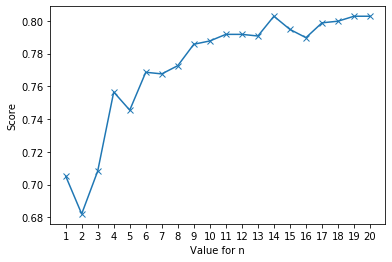

In [35]:
import matplotlib.pyplot as plt
range_n = range(1, len(entropy_with_index))    
op = plt.plot(range_n, scores_train_kmeans)
plt.setp(op,'marker', 'x')
plt.xlabel("Value for n")
plt.xticks(range_n)
plt.ylabel("Score")
print(max(scores_train_kmeans), "training score")
print(max(scores_test_kmeans), "test score")
plt.show()